In [3]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
pd.options.display.max_columns = None

In [9]:
df = pd.read_pickle("../data/top500_data_nona.pkl")

In [10]:
display(df.head(10))
print(df.columns.tolist())

Price       Adj Close                                                      \
Ticker              A       AAL      AAPL        ABT      ACGL        ACN   
Date                                                                        
2010-01-04  20.122231  4.496876  6.461977  18.952156  7.994444  32.212460   
2010-01-05  19.903646  5.005957  6.473150  18.799036  7.967778  32.411537   
2010-01-06  19.832930  4.798555  6.370183  18.903446  7.933333  32.756092   
2010-01-07  19.807222  4.939964  6.358408  19.060040  7.886667  32.725471   
2010-01-08  19.800783  4.845692  6.400681  19.157484  7.871111  32.595306   
2010-01-11  19.813646  4.751418  6.344217  19.254921  7.846667  32.564678   
2010-01-12  19.575775  4.789126  6.272050  19.199244  7.868889  32.357944   
2010-01-13  19.730062  5.166223  6.360522  19.381519  7.911111  32.725471   
2010-01-14  20.025801  5.269926  6.323684  19.402557  7.900000  33.016426   
2010-01-15  19.562920  5.185078  6.218002  19.451632  7.885556  32.779068   

Price                                                                         \
Ticker           ADBE        ADI        ADM        ADP       ADSK        AEE   
Date                                                                           
2010-01-04  37.090000  22.530371  21.623404  26.725899  25.670000  16.357771   
2010-01-05  37.700001  22.494801  21.740210  26.582369  25.280001  16.292957   
2010-01-06  37.619999  22.452116  21.685232  26.519974  25.340000  16.180998   
2010-01-07  36.889999  22.274269  21.458487  26.507500  25.480000  16.027790   
2010-01-08  36.689999  22.402323  21.190519  26.470058  26.260000  15.915827   
2010-01-11  36.209999  22.274269  21.204264  26.588615  26.250000  16.045465   
2010-01-12  35.660000  21.349436  20.977514  26.401419  25.889999  16.027790   
2010-01-13  36.279999  21.342319  21.066833  26.594858  26.250000  16.133862   
2010-01-14  35.900002  21.320974  21.121809  26.519974  26.600000  16.192776   
2010-01-15  35.869999  20.602453  20.984383  26.376451  26.080000  16.110291   

Price                                                                        \
Ticker            AEP       AES        AFL        AIG        AIZ        AJG   
Date                                                                          
2010-01-04  19.888439  9.562480  16.646255  19.506451  22.654465  15.202732   
2010-01-05  19.660757  9.464546  17.129158  19.140995  23.330494  15.121030   
2010-01-06  19.859976  9.366617  17.279638  19.016994  23.262894  15.127841   
2010-01-07  20.030741  9.373610  17.465094  18.651531  23.548325  15.032526   
2010-01-08  20.269812  9.639429  17.290129  19.147518  23.563349  15.073371   
2010-01-11  20.480425  9.702387  17.745041  19.336775  23.728596  15.093794   
2010-01-12  20.275501  9.590465  17.654060  18.573221  23.510771  15.182307   
2010-01-13  20.525965  9.849287  17.846519  18.964785  23.728596  15.175498   
2010-01-14  20.605648  9.856283  18.080973  18.664589  23.480715  15.134643   
2010-01-15  20.497496  9.821306  17.885014  18.312178  22.932384  14.978061   

Price                                                                    \
Ticker           AKAM        ALB       ALGN        ALL       AMAT   AMD   
Date                                                                      
2010-01-04  25.920000  31.243988  18.500000  21.949137  11.185110  9.70   
2010-01-05  26.690001  31.186565  18.010000  22.310017  11.099069  9.71   
2010-01-06  26.469999  31.243988  17.480000  22.317234  11.075605  9.57   
2010-01-07  26.480000  31.022518  17.430000  22.432724  10.958282  9.47   
2010-01-08  26.480000  31.490065  17.660000  22.526552  11.380655  9.43   
2010-01-11  26.389999  31.350620  17.540001  22.526552  11.630951  9.14   
2010-01-12  26.160000  30.915867  17.230000  22.504902  11.106893  8.65   
2010-01-13  26.040001  31.227583  17.580000  22.706991  11.161648  9.15   
2010-01-14  26.879999  31.104532  17.129999  22.836914  11.224222  9.00   
2010-01-15  26.610001  31.079

[('Adj Close', 'A'), ('Adj Close', 'AAL'), ('Adj Close', 'AAPL'), ('Adj Close', 'ABT'), ('Adj Close', 'ACGL'), ('Adj Close', 'ACN'), ('Adj Close', 'ADBE'), ('Adj Close', 'ADI'), ('Adj Close', 'ADM'), ('Adj Close', 'ADP'), ('Adj Close', 'ADSK'), ('Adj Close', 'AEE'), ('Adj Close', 'AEP'), ('Adj Close', 'AES'), ('Adj Close', 'AFL'), ('Adj Close', 'AIG'), ('Adj Close', 'AIZ'), ('Adj Close', 'AJG'), ('Adj Close', 'AKAM'), ('Adj Close', 'ALB'), ('Adj Close', 'ALGN'), ('Adj Close', 'ALL'), ('Adj Close', 'AMAT'), ('Adj Close', 'AMD'), ('Adj Close', 'AME'), ('Adj Close', 'AMGN'), ('Adj Close', 'AMP'), ('Adj Close', 'AMT'), ('Adj Close', 'AMZN'), ('Adj Close', 'ANSS'), ('Adj Close', 'AON'), ('Adj Close', 'AOS'), ('Adj Close', 'APA'), ('Adj Close', 'APD'), ('Adj Close', 'APH'), ('Adj Close', 'ARE'), ('Adj Close', 'ATO'), ('Adj Close', 'AVB'), ('Adj Close', 'AVGO'), ('Adj Close', 'AVY'), ('Adj Close', 'AWK'), ('Adj Close', 'AXON'), ('Adj Close', 'AXP'), ('Adj Close', 'AZO'), ('Adj Close', 'BA'), 

In [11]:
# Create a data extenion with daily adjusted close price for given stock
plot_data = df[[('Adj Close','MSFT'),('Adj Close','AAPL'),('Adj Close','NVDA'),('Adj Close','GOOG'),('Adj Close','AMZN')]].reset_index()
#plot_data.columns = plot_data.columns.get_level_values(0)
plot_data=plot_data.set_index('Date')
plot_data.head()

Price       Adj Close                                       
Ticker           MSFT      AAPL      NVDA       GOOG    AMZN
Date                                                        
2010-01-04  23.389399  6.461977  4.240231  15.610239  6.6950
2010-01-05  23.396963  6.473150  4.302147  15.541497  6.7345
2010-01-06  23.253372  6.370183  4.329665  15.149715  6.6125
2010-01-07  23.011541  6.358408  4.244816  14.797037  6.5000
2010-01-08  23.170248  6.400681  4.253987  14.994298  6.6760

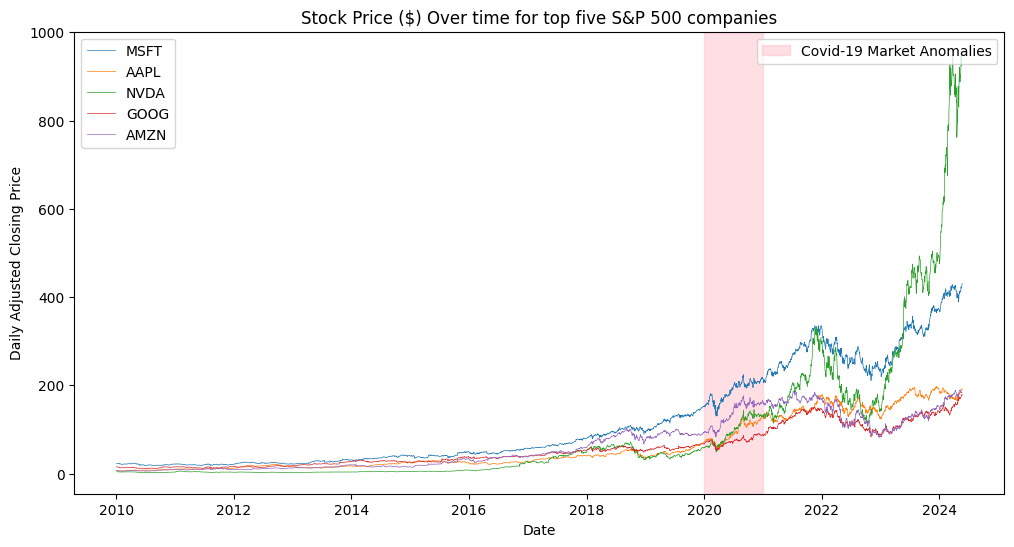

In [12]:
plt.figure(figsize=(12, 6)) 
for column in plot_data.columns:
    #print(column)
    plt.plot(plot_data[column],linewidth=0.5, label=column[1])
plt.axvspan('2020','2021',color='pink',alpha=.5)
first_legend=plt.legend(handles=[mpatches.Patch(color='pink',alpha=.5, label="Covid-19 Market Anomalies")],loc='upper right')
ax = plt.gca().add_artist(first_legend)
plt.title("Stock Price ($) Over time for top five S&P 500 companies") 
plt.xlabel("Date") 
plt.ylabel("Daily Adjusted Closing Price") 
plt.legend()
plt.show()

In [13]:
# Let us plot daily trading volume data
plot_data = df[[('Volume','MSFT'),('Volume','AAPL'),('Volume','NVDA'),('Volume','GOOG'),('Volume','AMZN')]].reset_index()
plot_data=plot_data.set_index('Date')
plot_data_log = plot_data.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)
plot_data_log_5years = plot_data_log[plot_data_log.index > '2017-12-31']
plot_data_log.head()

Price         Volume                                        
Ticker          MSFT      AAPL      NVDA      GOOG      AMZN
Date                                                        
2010-01-04  7.584434  8.693489  7.903201  7.895098  8.181838
2010-01-05  7.696790  8.779528  7.862518  8.081486  8.248066
2010-01-06  7.764792  8.742065  7.812357  8.203426  8.157082
2010-01-07  7.703804  8.678638  7.738616  8.410834  8.343613
2010-01-08  7.709248  8.650901  7.679581  8.278022  8.293606

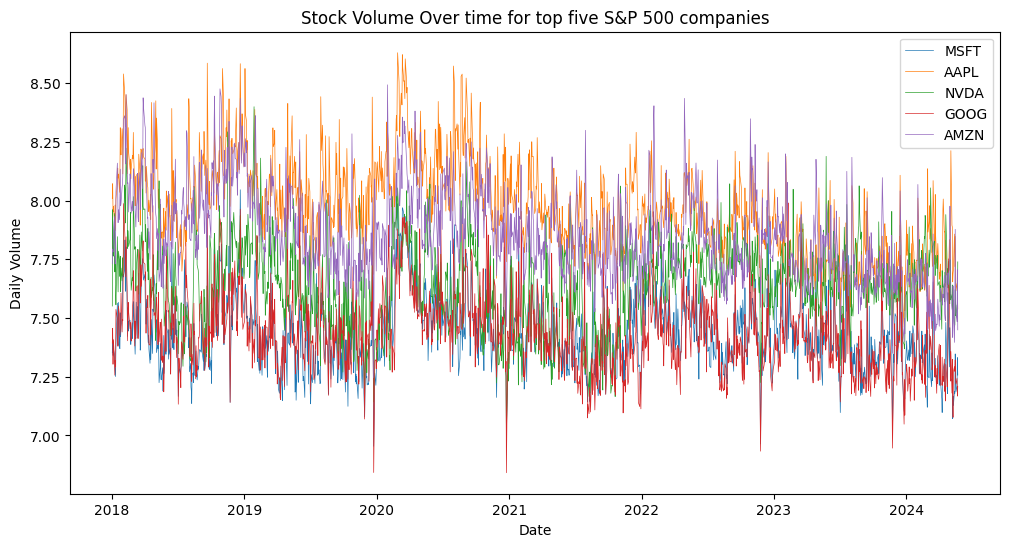

In [14]:
# plot the volume data
plt.figure(figsize=(12, 6)) 
for column in plot_data.columns:
    #print(column)
    plt.plot(plot_data_log_5years[column],linewidth=0.5, label=column[1])
#plt.axvspan('2020','2021',color='pink',alpha=.5)
#first_legend=plt.legend(handles=[mpatches.Patch(color='pink',alpha=.5, label="Covid-19 Market Anomalies")],loc='upper right')
#ax = plt.gca().add_artist(first_legend)
plt.title("Stock Volume Over time for top five S&P 500 companies") 
plt.xlabel("Date") 
plt.ylabel("Daily Volume") 
plt.legend()
plt.show()

In [ ]:
# Moving average for NVDA stock
plot_data = df[[('Volume','NVDA')]].reset_index()
plot_data=plot_data.set_index('Date')
plot_data['Moving Average'] = plot_data[('Volume','NVDA')].rolling(window=30).mean()
plot_data.dropna(inplace=True)
#print(plot_data)
plot_data.columns.tolist()